In [32]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [34]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [35]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 1 & S1/'

In [37]:
bc_state = pd.read_csv(file_path + 'barcode_states_BC1.csv')
bc_state

,No,cell_line,barcode,editd positions,edit ratio
0,0,15,000000000000',0,0.000000
1,1,16,100000000000',1,0.083333
2,2,65,010000000000',1,0.083333
3,3,66,001000000000',1,0.083333
4,4,67,000100000000',1,0.083333
5,5,68,000010000000',1,0.083333
6,6,69,000001000000',1,0.083333
7,7,70,000000100000',1,0.083333
8,8,71,000000010000',1,0.083333
9,9,72,000000001000',1,0.083333


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement

        path_DAPImask = data_dir + 'ch3_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch3_cp_masks.png'
        path_647mask = data_dir + 'ch1_mask_CNN/' + re.split('/', f)[-1][0:-4] + '_ch1_Probabilities.tif'
        path_546mask = data_dir + 'ch2_mask_CNN/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'

        path_DAPImax = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch3.tif'
        path_546max = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch2_rolling_50.tif'
        path_647max = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch1_rolling_50.tif'

In [38]:
cleaned_df = pd.read_csv(data_path + 'synthetic_BC1.csv')
cleaned_df

,label,area,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity_647,mean_intensity_546,...,barcode,editd positions,edit ratio,intensity_647,intensity_546,int_ratio,int_diff,width,height,mout avg
0,1,58,8.103448,942.810345,5,938,12,949,7450.965517,240.189655,...,000000000000',0,0.000000,12.976542,9.541872,0.735317,-4.955181,7,11,0.177856
1,2,14,20.500000,19.500000,19,18,23,22,3210.571429,84.428571,...,000000000000',0,0.000000,10.713262,7.074963,0.660393,-5.248955,4,4,0.440611
2,3,19,86.368421,134.947368,84,133,89,138,3446.105263,132.473684,...,000000000000',0,0.000000,11.089439,7.830823,0.706151,-4.701189,5,5,0.422706
3,4,21,101.190476,1109.000000,99,1107,104,1112,3713.952381,214.571429,...,000000000000',0,0.000000,11.264374,8.413165,0.746883,-4.113425,5,5,0.403848
4,5,15,123.400000,192.400000,122,191,126,195,3683.933333,149.666667,...,000000000000',0,0.000000,10.919787,7.716461,0.706649,-4.621422,4,4,0.337836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32063,97,86,1945.709302,878.290698,1941,874,1952,884,7521.441860,1076.104651,...,000000000001',1,0.083333,13.379860,11.435450,0.854676,-2.805191,11,10,1.318307
32064,98,17,1944.764706,1820.235294,1943,1817,1947,1825,360.235294,3101.352941,...,000000000001',1,0.083333,8.719971,10.872807,1.246886,3.105886,4,8,11.983118
32065,99,20,1951.250000,2016.250000,1949,2014,1954,2019,3401.100000,703.400000,...,000000000001',1,0.083333,11.127586,9.551658,0.858376,-2.273584,5,5,0.844629
32066,100,28,1961.964286,2036.250000,1959,2034,1966,2040,4518.321429,721.392857,...,000000000001',1,0.083333,11.748100,9.913388,0.843829,-2.646930,7,6,0.991011


In [39]:
total_barcode_counts = cleaned_df.groupby('editd positions', as_index=False)['barcode_number'].sum()
total_barcode_counts

,editd positions,barcode_number
0,0,442
1,1,10690
2,2,819
3,3,641
4,4,1393
5,5,1784
6,6,4647
7,7,3783
8,8,2985
9,9,1417


In [40]:
total_barcode_counts = cleaned_df.groupby('No', as_index=False)['barcode_number'].sum()
total_barcode_counts

,No,barcode_number
0,0,442
1,1,415
2,2,656
3,3,570
4,4,743
5,5,859
6,6,856
7,7,797
8,8,1426
9,9,1041


In [41]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig 1D
Grouped all the barcode arrays with the same number of edits 

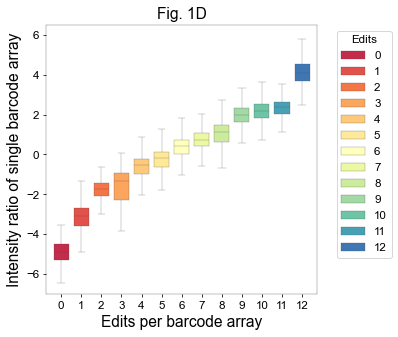

In [42]:
# single barcode array analysis
import os
import seaborn as sns
import matplotlib.pyplot as plt

temp_df = cleaned_df.copy()

color_palette = sns.color_palette("Spectral", n_colors=13)

plt.figure(figsize=(5, 5), dpi=70)
sns.boxplot(x='editd positions', 
            y='int_diff',
            hue='editd positions', 
            data=temp_df,
            palette=color_palette,
            linewidth=0.25,
            saturation=1,
            width=0.75,
            showfliers=False)

# Plot the regression line
#plt.plot(X, predicted_int_ratio, color='#B75EC2', linestyle='--', linewidth=2, label=f'Linear Regression (R²={r2:.2f})')

# Display the regression function
#plt.text(0, 1.28, f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}', color='black', fontsize=10)

plt.xlabel('Edits per barcode array')
plt.ylabel('Intensity ratio of single barcode array')
plt.title('Fig. 1D')
plt.legend(title='Edits', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().margins(x=0.03)
#sns.despine()
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
plt.ylim([-7, 6.5])
# Specify the save path
#save_path = os.path.join(data_dir, '221120_syn_BC8_intensity diff of barcode array for each edits status.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
#plt.savefig('221120_syn_BC8_intensity Ratio of barcode array for each edits status.svg', dpi=300, format='svg', transparent=True)
plt.show()

# Fig 1E

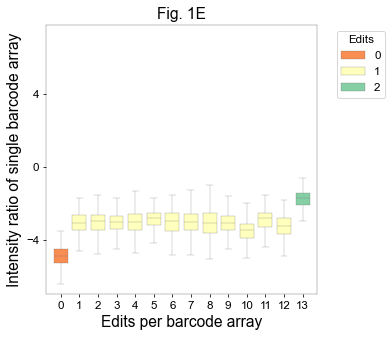

In [43]:
# Filter the DataFrame
positions = [0, 1, 2]

color_palette=sns.color_palette("Spectral", n_colors=3)

# Create a custom palette with colors for edited positions
#custom_palette = [color_palette[i] for i in positions]

temp_df = cleaned_df[cleaned_df['editd positions'].isin(positions)].copy()

# Create the plot
plt.figure(figsize=(5, 5), dpi=70)
sns.boxplot(x='No', 
            y='int_diff',
            hue='editd positions', 
            data=temp_df,
            palette=color_palette,
            linewidth=0.25,  # Set the width of the violin plots
            saturation=1,
            width=0.75, 
            showfliers=False)  # Do not show outliers)

plt.xlabel('Edits per barcode array')
plt.ylabel('Intensity ratio of single barcode array')
plt.title('Fig. 1E')
plt.legend(title='Edits', bbox_to_anchor=(1.05, 1), loc='upper left')
#Customize the y-axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=4))  # Set the number of ticks
#plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # Format the tick labels as integers
plt.ylim([-7, 7.8])
plt.gca().margins(x=0.03)
#sns.despine()
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
#save_path = os.path.join(data_dir, '221120_syn_BC8_Intensity Ratio of barcode array for edits 0, 1, 2.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
#plt.savefig('221120_syn_BC8_Intensity Ratio of barcode array for edits 0, 1, 2.svg', dpi=300, format='svg', transparent=True)
plt.show()